<a href="https://colab.research.google.com/github/Adler-1014/SNU_ML_GROUP2/blob/developSrk/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%B5%9C%EC%A2%85_%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [148]:
file_path = '/content/drive/MyDrive/머신러닝과제/Train.csv'

In [149]:
df = pd.read_csv(file_path)

# 기본 데이터 분석

In [150]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [152]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [153]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [154]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 결측치 대치

In [155]:
from sklearn.impute import KNNImputer

In [156]:
# KNN으로 Item_weight 대치

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'item_weight' 열의 결측치를 대치하기 위해 3가지 열의 데이터 추출
X = df[['Item_Weight', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Weight_imputed'] = X_imputed[:, 0]

In [157]:
df['Item_Weight_imputed'].describe()

count    8523.000000
mean       12.860689
std         4.317876
min         4.555000
25%         9.300000
50%        12.650000
75%        16.239500
max        21.350000
Name: Item_Weight_imputed, dtype: float64

In [158]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

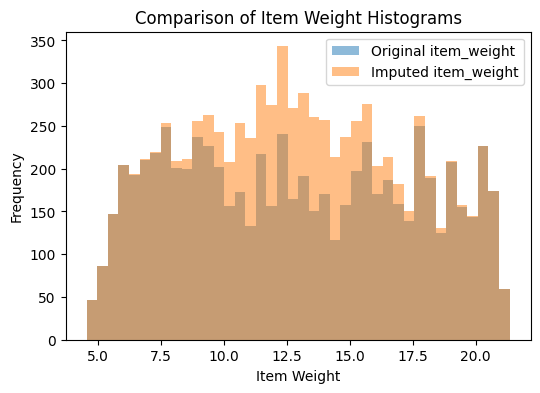

In [159]:
# 히스토그램 겹쳐그리기 비교 / 3개 열 사용
plt.figure(figsize=(6, 4))

# 첫 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight'], bins=40, alpha=0.5, label='Original item_weight')

# 두 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight_imputed'], bins=40, alpha=0.5, label='Imputed item_weight')

# 레이블과 제목 추가
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Comparison of Item Weight Histograms')
plt.legend()

# 그래프 표시
plt.show()

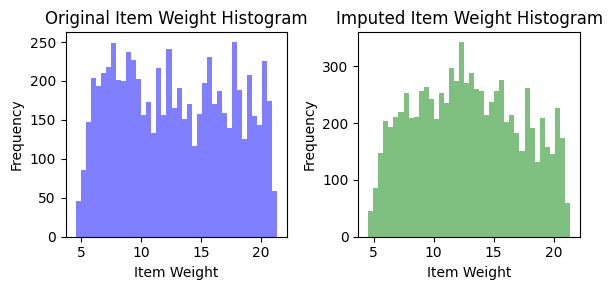

In [160]:
# 플롯 설정
plt.figure(figsize=(6, 3))

# 첫 번째 subplot: 원래 값의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(df['Item_Weight'], bins=40, color='blue', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Original Item Weight Histogram')

# 두 번째 subplot: 대치된 값의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(df['Item_Weight_imputed'], bins=40, color='green', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Imputed Item Weight Histogram')

# 플롯 보이기
plt.tight_layout()
plt.show()

In [161]:
# 아울렛 식별자 유니크 벨류 확인
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [162]:
# 아울렛 아이디 기준 아울렛 사이즈 판별
check_value_counts = df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()
check_value_counts

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

In [163]:
# 어울렛 아이디 기준 아울렛 결측치 확인. out 10, 17, 45가 없음
check_is_null = df.groupby('Outlet_Identifier')['Outlet_Size'].apply(lambda x: x.isnull().sum())
check_is_null

Outlet_Identifier
OUT010    555
OUT013      0
OUT017    926
OUT018      0
OUT019      0
OUT027      0
OUT035      0
OUT045    929
OUT046      0
OUT049      0
Name: Outlet_Size, dtype: int64

In [164]:
check = df.groupby('Outlet_Identifier').agg({
    'Outlet_Size': 'first',
    'Outlet_Establishment_Year': 'first',
    'Outlet_Location_Type': 'first',
    'Outlet_Type': 'first'
})
check

,Outlet_Size,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,
OUT010,None,1998,Tier 3,Grocery Store
OUT013,High,1987,Tier 3,Supermarket Type1
OUT017,None,2007,Tier 2,Supermarket Type1
OUT018,Medium,2009,Tier 3,Supermarket Type2
OUT019,Small,1985,Tier 1,Grocery Store
OUT027,Medium,1985,Tier 3,Supermarket Type3
OUT035,Small,2004,Tier 2,Supermarket Type1
OUT045,None,2002,Tier 2,Supermarket Type1
OUT046,Small,1997,Tier 1,Supermarket Type1


In [165]:
# 판매량 평균을 사이즈 예측에 활용
check_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
check_sales

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [166]:
# out010 은 grocery store 이며 small size. 그로서리 스토어는 일반적으로 작고 판매량도 340내외
# out017 은 supermarket type1 이며 small size. 로케이션 타입이 티어2로 동일하고 아울렛 타입도 슈퍼마켓 1인 다른 데이터와 유사하다고 가정
# out045 은 supermarket type1 이며 small size. 로케이션 타입이 티어2로 동일하고 아울렛 타입도 슈퍼마켓 1인 다른 데이터와 유사하다고 가정

In [167]:
# 전부 small로 대치
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [168]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_imputed             0
dtype: int64

In [169]:
# imputed만 쓸거니까 아이템 웨이트 컬럼은 삭제
df = df.drop(columns='Item_Weight')

In [170]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_imputed          0
dtype: int64

In [171]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


# 기타 전처리

In [172]:
# 저지방 식품 컬럼 정리
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [173]:
# 모델 훈련 방해 안되게 설립년도 줄이기
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [174]:
# 제품코드 라벨링 하기
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [175]:
# 저지방 제품 태그 없애기
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [176]:
# Item_visibility가 0인 경우 knn으로 대치

# 0 값을 결측치로 처리
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 대치할 열들 선택 및 추출
X = df[['Item_Weight_imputed', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Visibility_imputed'] = X_imputed[:, 2]

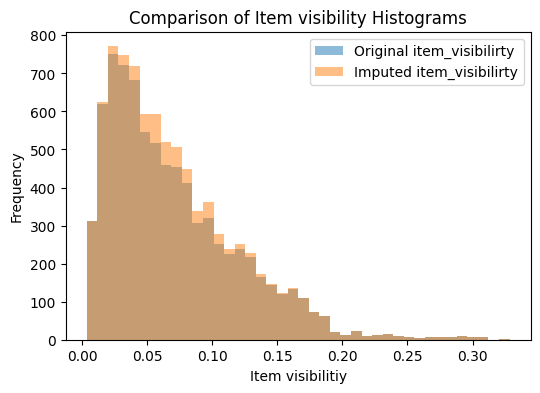

In [177]:
# 히스토그램 겹쳐그리기 비교 / 3개 열 사용
plt.figure(figsize=(6, 4))

# 첫 번째 열에 대한 히스토그램
plt.hist(df['Item_Visibility'], bins=40, alpha=0.5, label='Original item_visibilirty')

# 두 번째 열에 대한 히스토그램
plt.hist(df['Item_Visibility_imputed'], bins=40, alpha=0.5, label='Imputed item_visibilirty')

# 레이블과 제목 추가
plt.xlabel('Item visibilitiy')
plt.ylabel('Frequency')
plt.title('Comparison of Item visibility Histograms')
plt.legend()

# 그래프 표시
plt.show()

In [178]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed,Outlet_Years,New_Item_Type,Item_Visibility_imputed
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,24,Food,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,14,Drinks,0.019278
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,24,Food,0.016760
3,FDX07,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,25,Food,0.047581
4,NCD19,Non-Edible,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,36,Non-Consumable,0.070290


# one-hot-encoding

In [179]:
df_one_hot = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_one_hot.head()

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_imputed,Outlet_Years,Item_Visibility_imputed,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,9.30,24,0.016047,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,5.92,14,0.019278,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,2097.2700,17.50,24,0.016760,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,NaN,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,19.20,25,0.047581,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,NaN,Household,53.8614,OUT013,1987,994.7052,8.93,36,0.070290,...,False,False,True,False,True,False,False,False,False,True


# 인풋 나누기

In [180]:
# X 변수 정리(필요없는 컬럼 제거, y 설정)
#X = df.drop(columns=['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
#y = df['Item_Outlet_Sales']

In [181]:
# one_hot 버전 테스트
X = df_one_hot.drop(columns=['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# OOP 활용

In [182]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# 모델들을 클래스화 했습니다. 사용하는데 편하지 않을까요? 자주쓰는 모델들은 대부분 불러왔습니다.
# 지원하는 모델은 def initaliz~ 코드를 확인해주시면됩니당
class CustomModel(BaseEstimator, RegressorMixin):
    def __init__(self, model_type='linear_regression'):
        """
        Initialize the CustomModel with a specified model type.
        :param model_type: str, the type of model to use ('random_forest', 'linear_regression', 'svr', 'xgboost', 'gradient_boosting', 'decision_tree', 'knn', 'elastic_net')
        """
        self.model_type = model_type
        self.model = None

    # 전처리 부분도 함수를 선언해놓긴 했습니다. 그러나 각자 전처리 방법이 다를 것 같아
    # train_X 데이터를 그냥 사용하는 식으로 작성했습니다.
    def preprocess(self, X):
        """
        Handle all preprocessing steps like feature encoding, normalization, etc.
        Modify this method as needed when preprocessing changes.
        :param X: DataFrame, features to be preprocessed
        :return: DataFrame, preprocessed features
        """
        return X

    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        :param X: DataFrame, training features
        :param y: Series, training target
        """
        X_preprocessed = self.preprocess(X)
        # Model initialization based on the model_type
        self.initialize_model()
        self.model.fit(X_preprocessed, y)

    def predict(self, X):
        """
        Predict using the model.
        :param X: DataFrame, features for prediction
        :return: array, predictions
        """
        X_preprocessed = self.preprocess(X)
        return self.model.predict(X_preprocessed)

    def score(self, X, y):
        """
        Returns the R-squared score of the prediction.
        :param X: DataFrame, test features
        :param y: Series, true values
        :return: float, R-squared score
        """
        predictions = self.predict(X)
        return r2_score(y, predictions)

    def initialize_model(self):
        """
        Initialize the specific type of model based on model_type attribute.
        """
        if self.model_type == 'random_forest':
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif self.model_type == 'linear_regression':
            self.model = LinearRegression()
        elif self.model_type == 'svr':
            self.model = SVR(kernel='rbf')
        elif self.model_type == 'xgboost':
            self.model = XGBRegressor(objective='reg:squarederror')
        elif self.model_type == 'gradient_boosting':
            self.model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
        elif self.model_type == 'decision_tree':
            self.model = DecisionTreeRegressor(random_state=42)
        elif self.model_type == 'knn':
            self.model = KNeighborsRegressor()
        elif self.model_type == 'elastic_net':
            self.model = ElasticNet(random_state=42)
        else:
            raise ValueError("Unsupported model type")

    # 중요변수를 출력하는 부분들을 추가했습니다. 다만 모든 모델이 지원하지는 않습니다.
    # 지원하지 않는 모델의 경우에는 경고문을 출력할 수 있게 작성했습니다.
    # 그리고 중요 변수를 그래프 형태로 볼 수 있도록 작성했습니다.
    def get_feature_importance(self, feature_names):
        """
        Retrieve and plot feature importance from the model if available.
        :param feature_names: list, names of the features used for model training
        """
        if hasattr(self.model, 'feature_importances_'):
            importances = self.model.feature_importances_
        elif hasattr(self.model, 'coef_'):
            importances = np.abs(self.model.coef_)
        else:
            print("Feature importance not supported for this model type.")
            return

        # Create a bar chart of the feature importances
        plt.figure(figsize=(10, 6))
        indices = np.argsort(importances)
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()


# Example usage:
# feature_names = X_train.columns.tolist()
# model = CustomModel(model_type='xgboost')
# model.fit(X_train, Y_train)
# print("Training score:", model.score(X_train, Y_train))
# print("Test score:", model.score(X_test, Y_test))
# print("Feature Importances:",model.get_feature_importance(feature_names))

# 모델 트레이닝

In [183]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_MRP                       6818 non-null   float64
 1   Item_Weight_imputed            6818 non-null   float64
 2   Outlet_Years                   6818 non-null   int64  
 3   Item_Visibility_imputed        6818 non-null   float64
 4   Item_Fat_Content_Low Fat       6818 non-null   bool   
 5   Item_Fat_Content_Non-Edible    6818 non-null   bool   
 6   Item_Fat_Content_Regular       6818 non-null   bool   
 7   Outlet_Size_High               6818 non-null   bool   
 8   Outlet_Size_Medium             6818 non-null   bool   
 9   Outlet_Size_Small              6818 non-null   bool   
 10  Outlet_Location_Type_Tier 1    6818 non-null   bool   
 11  Outlet_Location_Type_Tier 2    6818 non-null   bool   
 12  Outlet_Location_Type_Tier 3    6818 non-null   bool

In [186]:
# XGBoost 회귀 모델 정의
model = xgb.XGBRegressor()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# R^2 값 계산
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print("R^2 Score:", r2)
print("Mean_squared_error:", mse)

R^2 Score: 0.5478701880285606
Mean_squared_error: 1228875.2951634196


Results for random_forest:
Training Score: 0.9360
Test Score: 0.5692
Feature Importances:


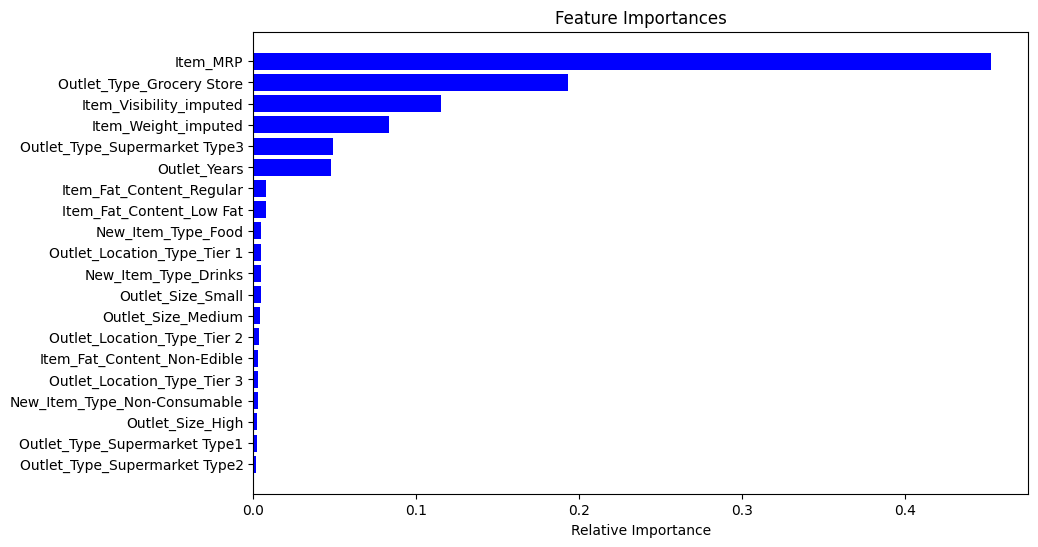


------------------------------------------------------------

Results for linear_regression:
Training Score: 0.5584
Test Score: 0.5804
Feature Importances:


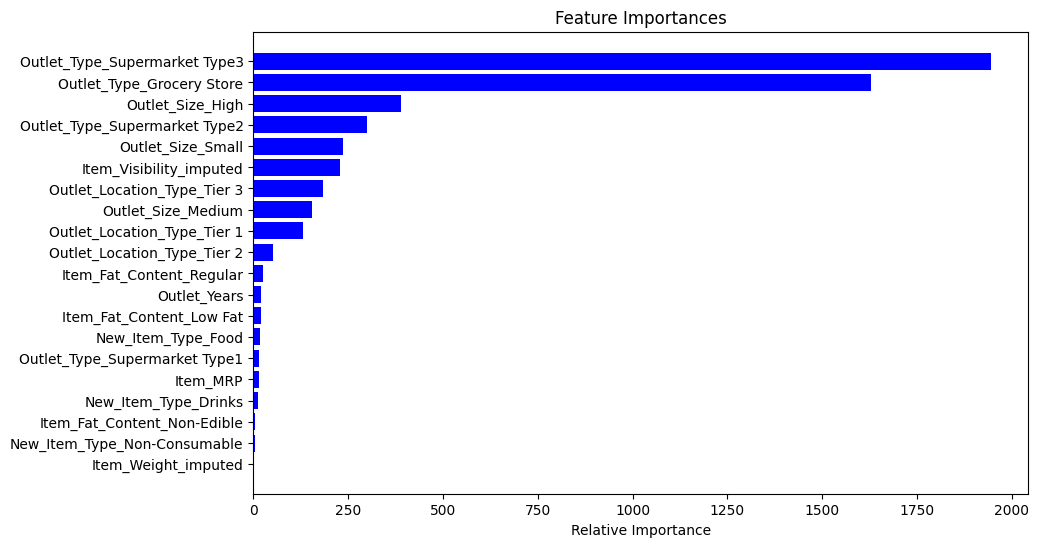


------------------------------------------------------------

Results for svr:
Training Score: 0.1799
Test Score: 0.2008

------------------------------------------------------------

Results for xgboost:
Training Score: 0.8621
Test Score: 0.5479
Feature Importances:


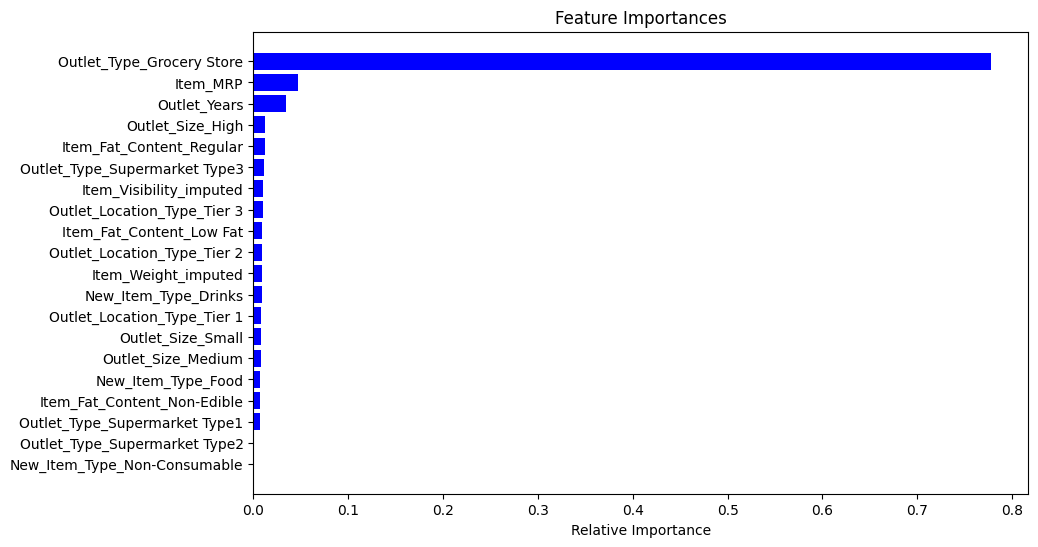


------------------------------------------------------------

Results for gradient_boosting:
Training Score: 0.6330
Test Score: 0.6043
Feature Importances:


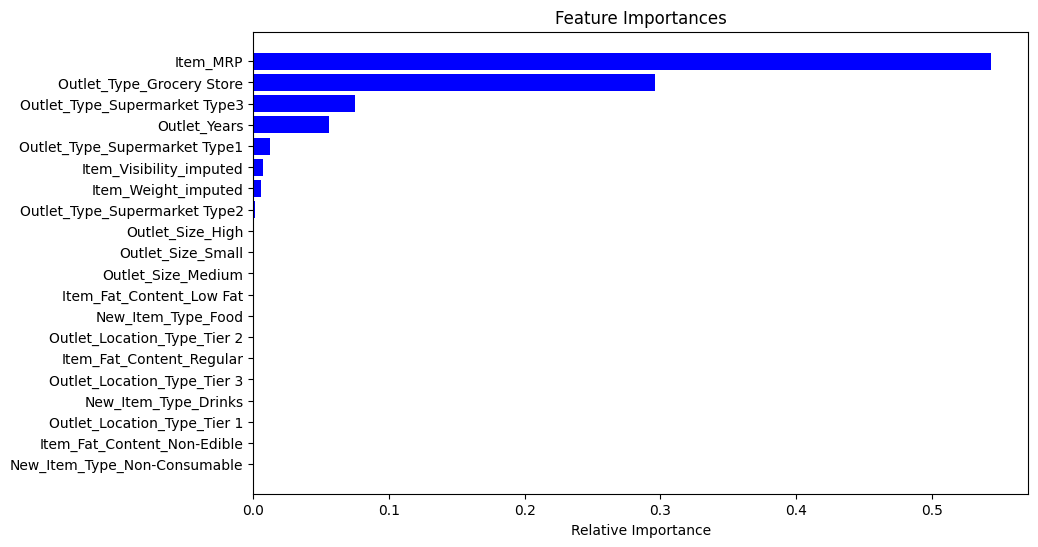


------------------------------------------------------------

Results for decision_tree:
Training Score: 1.0000
Test Score: 0.1863
Feature Importances:


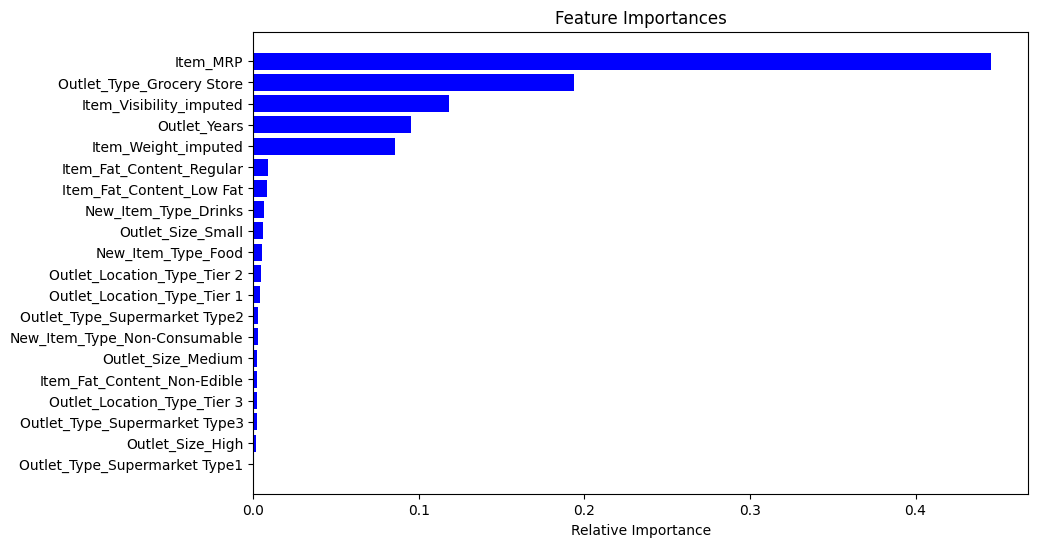


------------------------------------------------------------

Results for knn:
Training Score: 0.6259
Test Score: 0.4594

------------------------------------------------------------

Results for elastic_net:
Training Score: 0.4397
Test Score: 0.4514
Feature Importances:


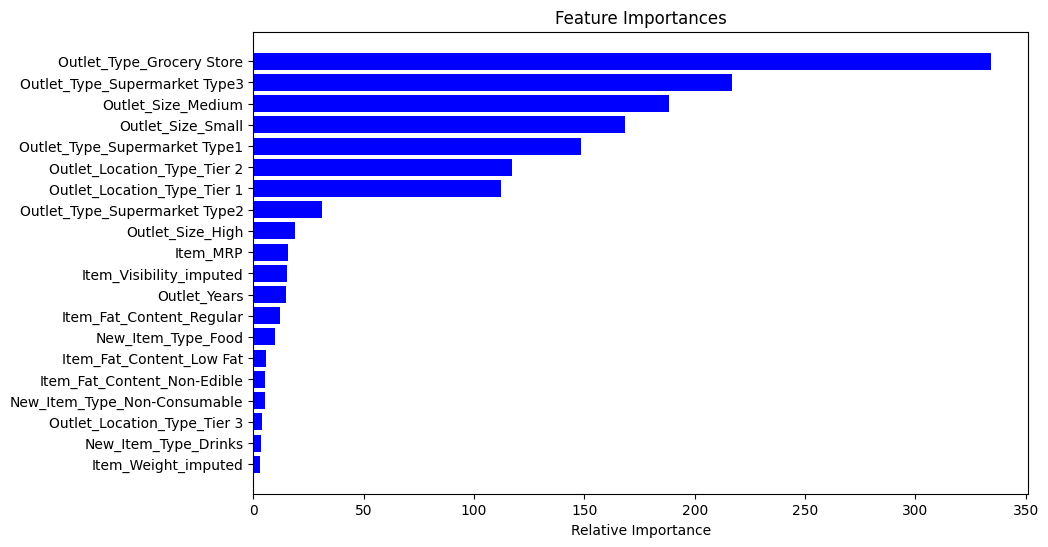


------------------------------------------------------------

                   Training Score  Test Score
random_forest            0.936030    0.569174
linear_regression        0.558379    0.580425
svr                      0.179884    0.200822
xgboost                  0.862143    0.547870
gradient_boosting        0.632965    0.604254
decision_tree            1.000000    0.186328
knn                      0.625921    0.459378
elastic_net              0.439702    0.451397


In [187]:
# Assuming CustomModel class is already defined and imported
model_types = ['random_forest', 'linear_regression', 'svr', 'xgboost', 'gradient_boosting', 'decision_tree', 'knn', 'elastic_net']

# Dictionary to store the results
results = {}

# Iterate over each model type, fit, predict, and display results
for model_type in model_types:
    print(f"Results for {model_type}:")
    model = CustomModel(model_type=model_type)
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)

    # Storing results
    results[model_type] = {'Training Score': train_score, 'Test Score': test_score}

    # Output scores
    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")

    # Feature Importance - Only if applicable
    if model_type not in ['svr', 'knn']:  # Assuming SVR and KNN don't support feature importance in your implementation
        print("Feature Importances:")
        model.get_feature_importance(X_train.columns)
    print("\n" + "-"*60 + "\n")

# Optionally, convert results to a DataFrame for better visualization or further analysis
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

In [188]:
# 그라디언트 부스팅 검증 / 10 fold / R2 0.594 - 1094

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# 10-fold CV를 사용한 교차 검증 수행
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=make_scorer(mean_squared_error))

# 교차 검증 결과 출력
print("Mean R^2 score:", r2_scores.mean())
print("Mean MSE score:", mse_scores.mean())

Mean R^2 score: 0.5942282211251181
Mean MSE score: 1198517.7509365263


In [189]:
# 라이트 gbm 검증 / 10 fold / R2 0.566
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMRegressor()

# 10-fold CV를 사용한 교차 검증 수행
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=make_scorer(mean_squared_error))

# 교차 검증 결과 출력
print("Mean R^2 score:", r2_scores.mean())
print("Mean MSE score:", mse_scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 6136, number of used features: 20
[LightGBM] [Info] Start training from score 2209.431042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 6136, number of used features: 20
[LightGBM] [Info] Start training from score 2202.139577
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [190]:
# XGBoost 검증 / 10 fold / R2 0.504
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# XGBoost 회귀 모델 정의
model = xgb.XGBRegressor()

# 10-fold CV를 사용한 교차 검증 수행
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=make_scorer(mean_squared_error))

# 교차 검증 결과 출력
print("Mean R^2 score:", r2_scores.mean())
print("Mean MSE score:", mse_scores.mean())

Mean R^2 score: 0.5043984719100465
Mean MSE score: 1462714.8679537906


In [191]:
# 랜덤포레스트 리그레서 / 10 fold / R2 0.541 - 1165
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 정의
model = RandomForestRegressor()

# 10-fold CV를 사용한 교차 검증 수행
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=make_scorer(mean_squared_error))

# 교차 검증 결과 출력
print("Mean R^2 score:", r2_scores.mean())
print("Mean MSE score:", mse_scores.mean())

Mean R^2 score: 0.5406369048418963
Mean MSE score: 1355509.0970673633


# 테스트 : knn+원핫 인코딩 .59744

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score

# 그라디언트 부스팅 모델 정의
model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5]  # 트리의 최대 깊이
}

# R^2를 사용하여 그리드 서치 수행
r2_scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search.fit(X_train, Y_train)

# 최적 하이퍼파라미터와 최고 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best R^2 score: 0.5982744133019764


In [193]:
# 그라디언트 부스팅 모델 정의 / 최종 R2:0.59744
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)

# 10-fold 교차 검증 수행
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')

# 교차 검증 결과 출력
print("Mean MSE score:", -mse_scores.mean())  # negate back to positive value
print("Mean R^2 score:", r2_scores.mean())

Mean MSE score: 1188723.4691557162
Mean R^2 score: 0.5974402425592632


# 전처리 : knn+레이블 인코딩

In [72]:
# case1. KNN은 그대로 하고 원 핫 인코딩만 일부 레이블 인코딩으로 변경
df = pd.read_csv(file_path)

In [73]:
# KNN으로 Item_weight 대치

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'item_weight' 열의 결측치를 대치하기 위해 3가지 열의 데이터 추출
X = df[['Item_Weight', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Weight_imputed'] = X_imputed[:, 0]

In [80]:
# 전부 small로 대치
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [81]:
# imputed만 쓸거니까 아이템 웨이트 컬럼은 삭제
df = df.drop(columns='Item_Weight')

In [82]:
# 저지방 식품 컬럼 정리
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [83]:
# 모델 훈련 방해 안되게 설립년도 줄이기
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [84]:
# 제품코드 라벨링 하기
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [85]:
# 저지방 제품 태그 없애기
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [98]:
# Item_visibility가 0인 경우 knn으로 대치

# 0 값을 결측치로 처리
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 대치할 열들 선택 및 추출
X = df[['Item_Weight_imputed', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Visibility_imputed'] = X_imputed[:, 2]

In [91]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_imputed', 'Outlet_Years',
       'New_Item_Type', 'Item_Visibility_imputed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 포함한 데이터 예시
df_cat_col = df[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 레이블 인코딩 적용
encoded_data = df_cat_col.apply(label_encoder.fit_transform)

# 원본 DataFrame의 해당 열을 레이블 인코딩된 값으로 대체
df[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = encoded_data

# 결과 출력
print("DataFrame after label encoding:")
print(df)

In [97]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed,Outlet_Years,Item_Visibility_imputed,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,9.30,24,0.016047,True,False,False,False,True,False
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,5.92,14,0.019278,False,False,True,True,False,False
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,17.50,24,0.016760,True,False,False,False,True,False
3,FDX07,NaN,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,19.20,25,0.047581,False,False,True,False,True,False
4,NCD19,NaN,Household,53.8614,OUT013,1987,0,2,1,994.7052,8.93,36,0.070290,False,True,False,False,False,True


In [100]:
# 레이블 인코딩 버전 테스트 / ID 지우기도 취소
X = df.drop(columns=['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# 테스트 : 레이블+원핫 인코딩 .59672 - 1091

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Results for random_forest:
Training Score: 0.9358
Test Score: 0.5705
Feature Importances:


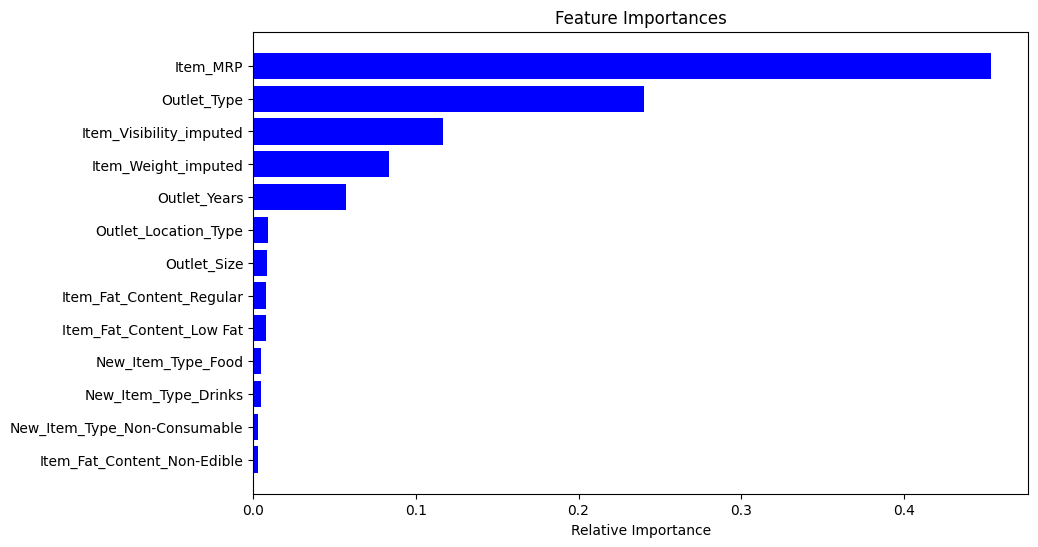


------------------------------------------------------------

Results for linear_regression:
Training Score: 0.4966
Test Score: 0.5204
Feature Importances:


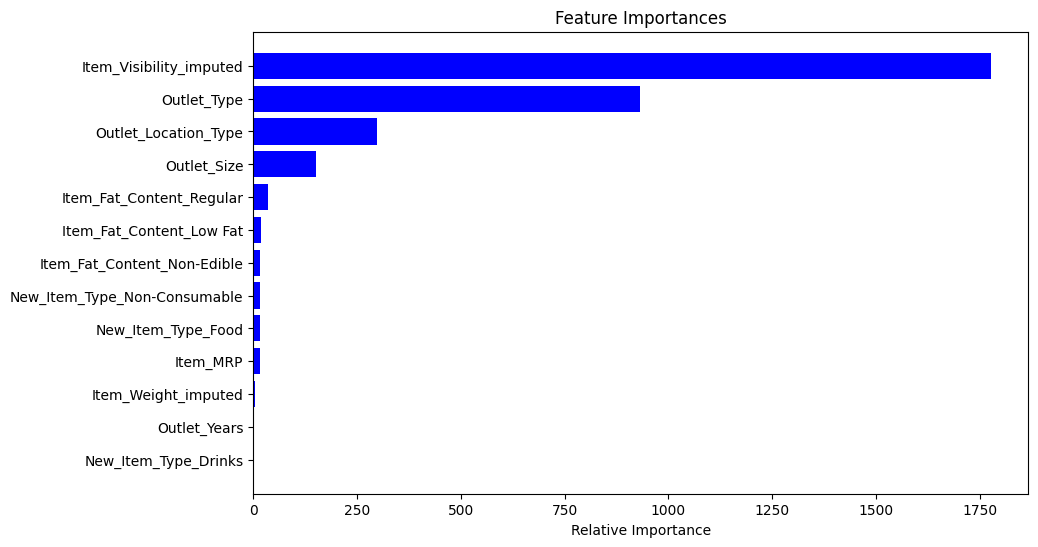


------------------------------------------------------------

Results for svr:
Training Score: 0.1820
Test Score: 0.2029

------------------------------------------------------------

Results for xgboost:
Training Score: 0.8674
Test Score: 0.5428
Feature Importances:


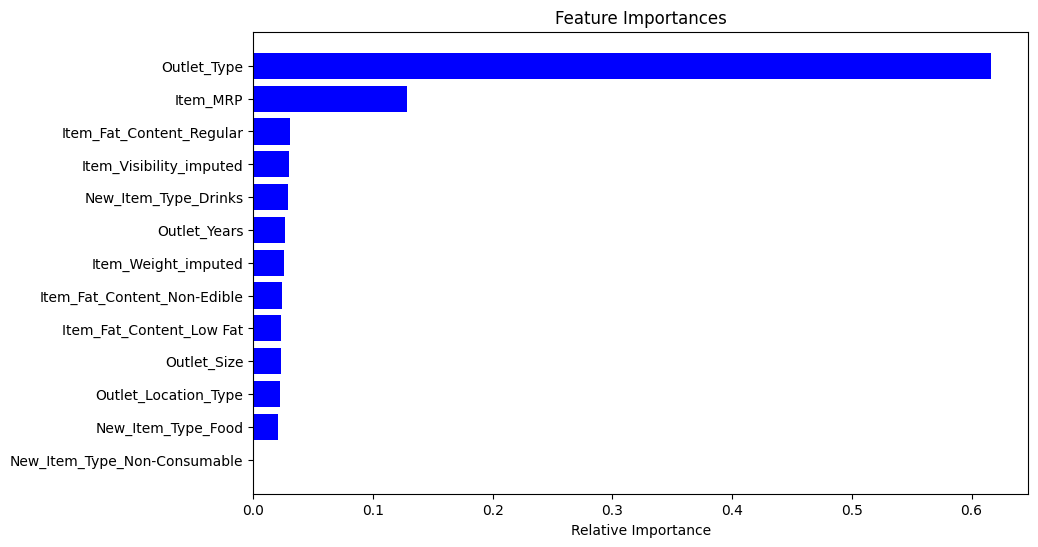


------------------------------------------------------------

Results for gradient_boosting:
Training Score: 0.6322
Test Score: 0.6056
Feature Importances:


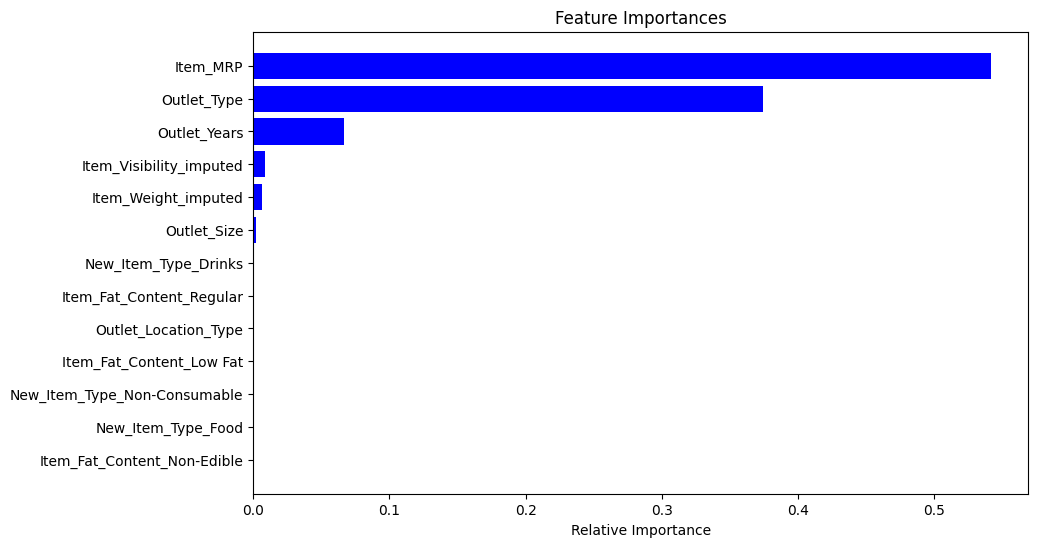


------------------------------------------------------------

Results for decision_tree:
Training Score: 1.0000
Test Score: 0.1860
Feature Importances:


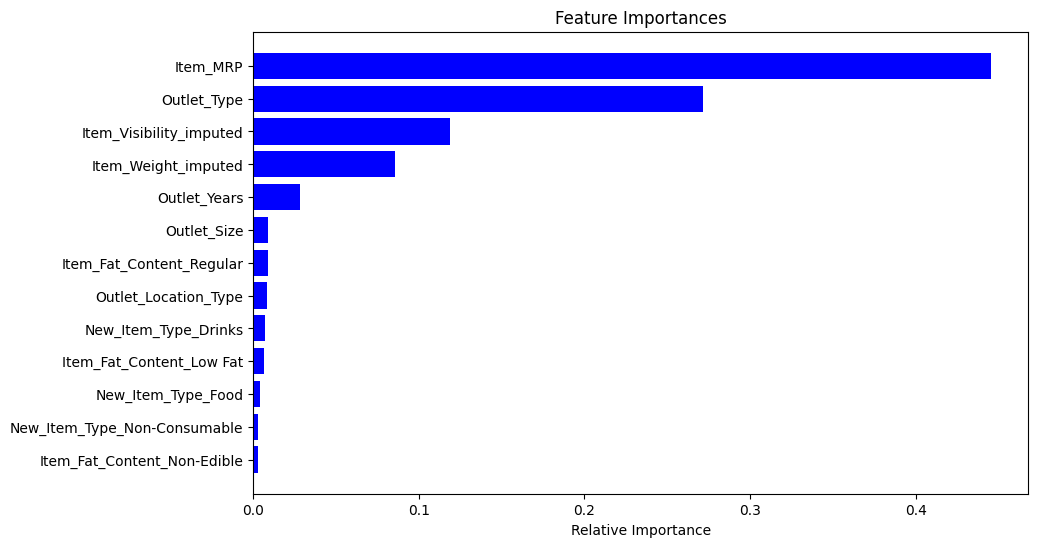


------------------------------------------------------------

Results for knn:
Training Score: 0.6460
Test Score: 0.4918

------------------------------------------------------------

Results for elastic_net:
Training Score: 0.4528
Test Score: 0.4694
Feature Importances:


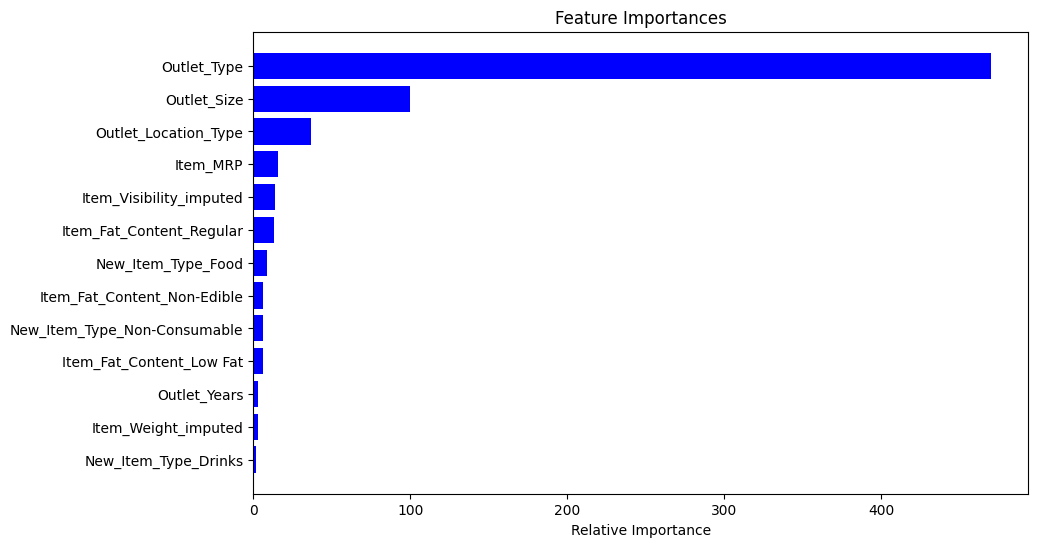


------------------------------------------------------------

                   Training Score  Test Score
random_forest            0.935847    0.570508
linear_regression        0.496636    0.520351
svr                      0.182008    0.202922
xgboost                  0.867446    0.542788
gradient_boosting        0.632244    0.605609
decision_tree            1.000000    0.186012
knn                      0.646000    0.491772
elastic_net              0.452793    0.469448


In [103]:
# Assuming CustomModel class is already defined and imported
model_types = ['random_forest', 'linear_regression', 'svr', 'xgboost', 'gradient_boosting', 'decision_tree', 'knn', 'elastic_net']

# Dictionary to store the results
results = {}

# Iterate over each model type, fit, predict, and display results
for model_type in model_types:
    print(f"Results for {model_type}:")
    model = CustomModel(model_type=model_type)
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)

    # Storing results
    results[model_type] = {'Training Score': train_score, 'Test Score': test_score}

    # Output scores
    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")

    # Feature Importance - Only if applicable
    if model_type not in ['svr', 'knn']:  # Assuming SVR and KNN don't support feature importance in your implementation
        print("Feature Importances:")
        model.get_feature_importance(X_train.columns)
    print("\n" + "-"*60 + "\n")

# Optionally, convert results to a DataFrame for better visualization or further analysis
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

In [104]:
# 그라디언트 부스팅 모델 정의
model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5]  # 트리의 최대 깊이
}

# R^2를 사용하여 그리드 서치 수행
r2_scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search.fit(X_train, Y_train)

# 최적 하이퍼파라미터와 최고 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best R^2 score: 0.598557803567426


In [105]:
# 그라디언트 부스팅 모델 정의 / 최종 R2:0.59672
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)

# 10-fold 교차 검증 수행
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')

# 교차 검증 결과 출력
print("Mean MSE score:", -mse_scores.mean())  # negate back to positive value
print("Mean R^2 score:", r2_scores.mean())

Mean MSE score: 1190541.6132708346
Mean R^2 score: 0.5967223081320037


# 전처리 : 결측치 linear 보간법 사용 (레이블+원핫)

In [107]:
# case2. Linear 보간법 사용 + 원 핫 인코딩을 일부 레이블 인코딩으로 변경
df = pd.read_csv(file_path)

In [108]:
# 결측치를 선형 보간법으로 대체
df['Item_Weight'] = df['Item_Weight'].interpolate(method='linear')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


In [110]:
# 전부 small로 대치
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [111]:
# 저지방 식품 컬럼 정리
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [112]:
# 모델 훈련 방해 안되게 설립년도 줄이기
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [113]:
# 제품코드 라벨링 하기
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [114]:
# 저지방 제품 태그 없애기
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [115]:
# Item_visibility가 0인 경우 knn으로 대치

# 0 값을 결측치로 처리
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

df['Item_Visibility'] = df['Item_Visibility'].interpolate(method='linear')

0       0.016047
1       0.019278
2       0.016760
3       0.015755
4       0.014751
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [117]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 포함한 데이터 예시
df_cat_col = df[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 레이블 인코딩 적용
encoded_data = df_cat_col.apply(label_encoder.fit_transform)

# 원본 DataFrame의 해당 열을 레이블 인코딩된 값으로 대체
df[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = encoded_data

# 결과 출력
print("DataFrame after label encoding:")
print(df)

DataFrame after label encoding:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.015755   
4              NCD19        8.930       Non-Edible         0.014751   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600       Non-Edible         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [118]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,24,True,False,False,False,True,False
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,14,False,False,True,True,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,24,True,False,False,False,True,False
3,FDX07,19.20,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,25,False,False,True,False,True,False
4,NCD19,8.93,0.014751,Household,53.8614,OUT013,1987,0,2,1,994.7052,36,False,True,False,False,False,True


In [119]:
# 리니어 보간법 + 레이블 인코딩 버전 테스트
X = df.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# 테스트 : 리니어 보간법+레이블 인코딩 .59613 - 1092

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Results for random_forest:
Training Score: 0.9375
Test Score: 0.5610
Feature Importances:


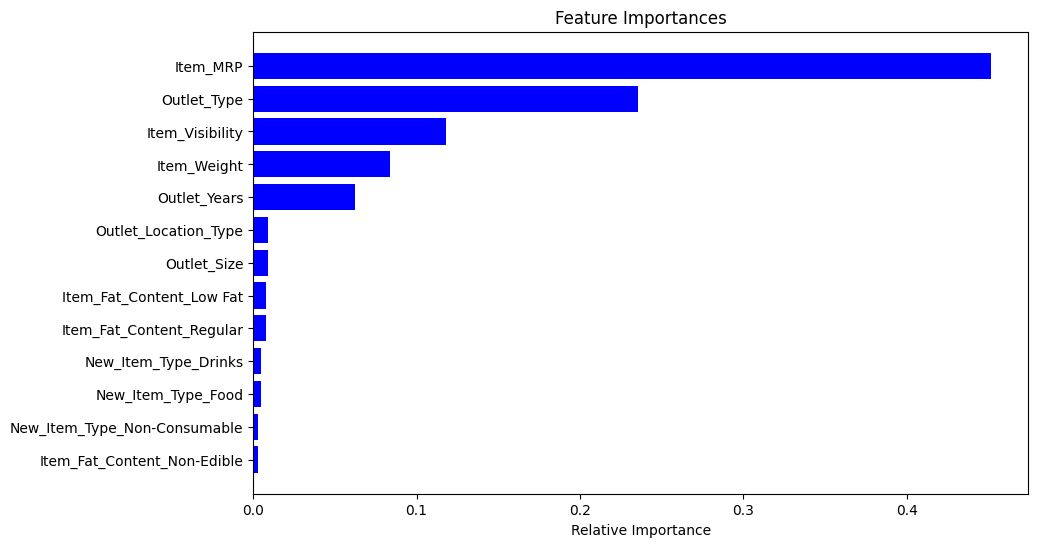


------------------------------------------------------------

Results for linear_regression:
Training Score: 0.4969
Test Score: 0.5203
Feature Importances:


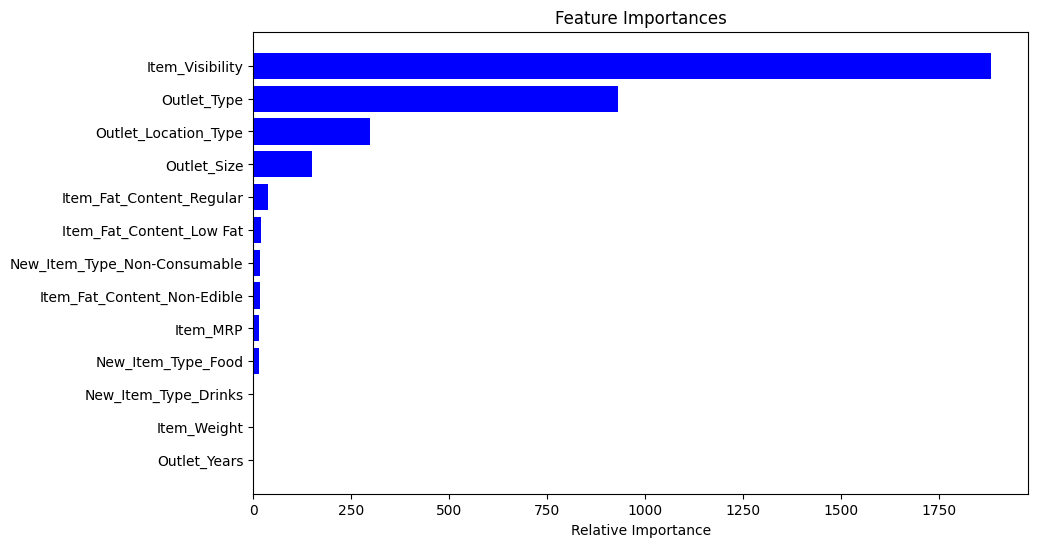


------------------------------------------------------------

Results for svr:
Training Score: 0.1820
Test Score: 0.2029

------------------------------------------------------------

Results for xgboost:
Training Score: 0.8630
Test Score: 0.5379
Feature Importances:


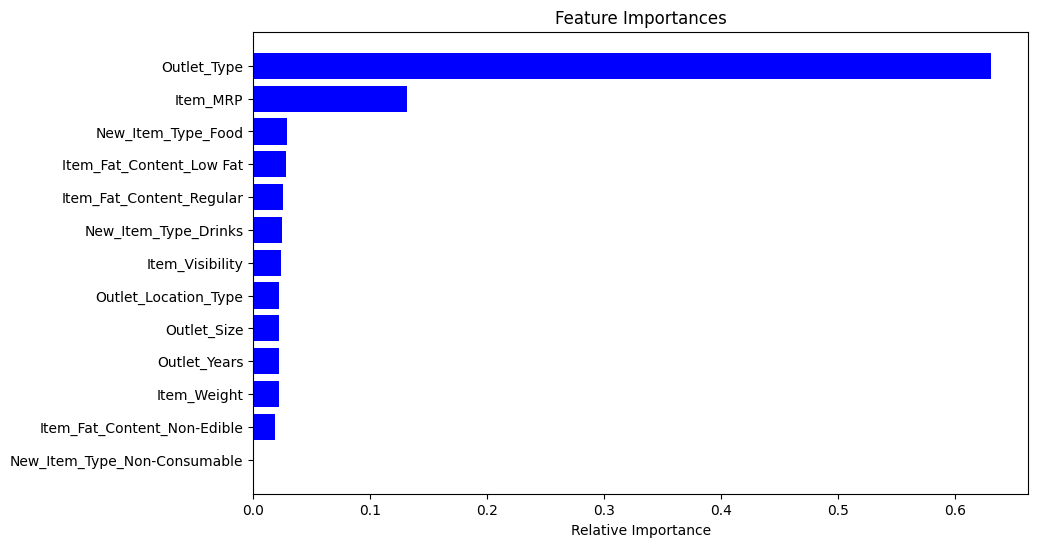


------------------------------------------------------------

Results for gradient_boosting:
Training Score: 0.6323
Test Score: 0.6048
Feature Importances:


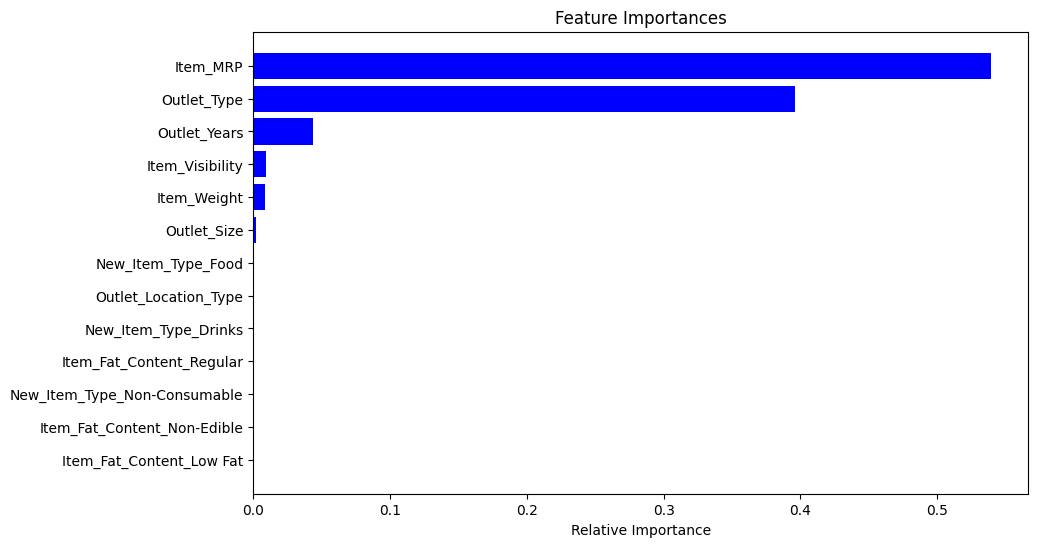


------------------------------------------------------------

Results for decision_tree:
Training Score: 1.0000
Test Score: 0.2091
Feature Importances:


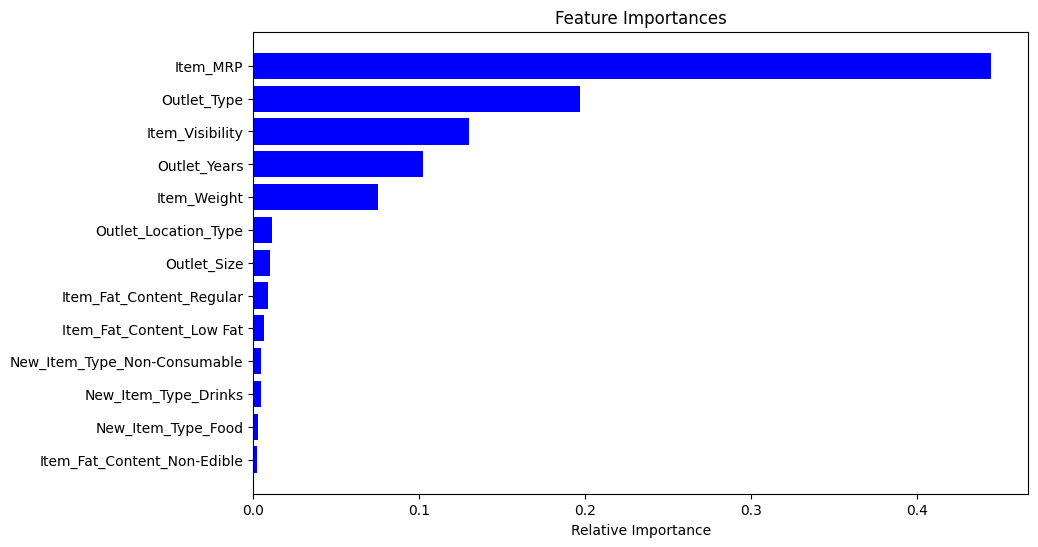


------------------------------------------------------------

Results for knn:
Training Score: 0.6447
Test Score: 0.4544

------------------------------------------------------------

Results for elastic_net:
Training Score: 0.4528
Test Score: 0.4697
Feature Importances:


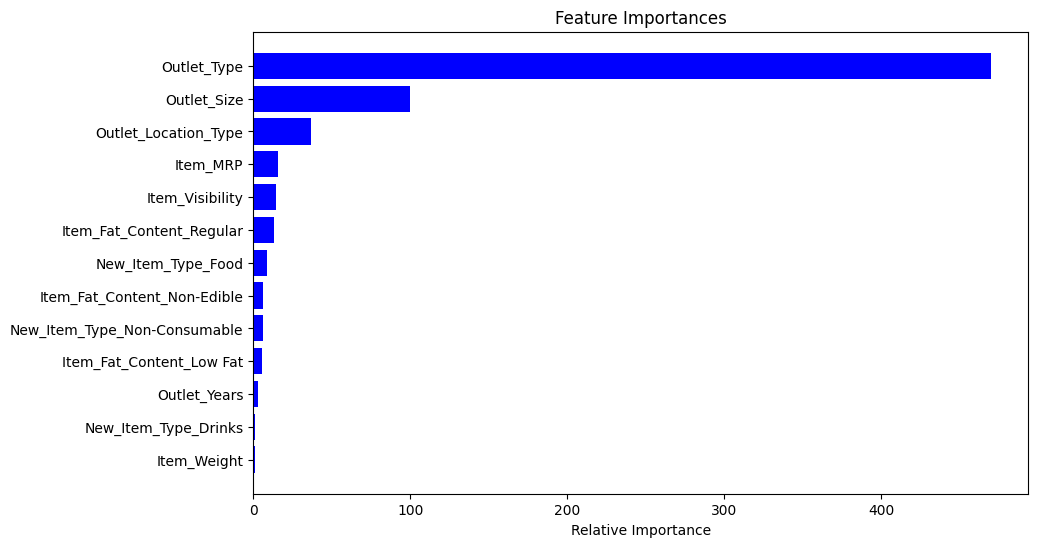


------------------------------------------------------------

                   Training Score  Test Score
random_forest            0.937488    0.560963
linear_regression        0.496904    0.520258
svr                      0.181991    0.202916
xgboost                  0.863028    0.537868
gradient_boosting        0.632253    0.604843
decision_tree            1.000000    0.209126
knn                      0.644667    0.454383
elastic_net              0.452751    0.469708


In [121]:
# Assuming CustomModel class is already defined and imported
model_types = ['random_forest', 'linear_regression', 'svr', 'xgboost', 'gradient_boosting', 'decision_tree', 'knn', 'elastic_net']

# Dictionary to store the results
results = {}

# Iterate over each model type, fit, predict, and display results
for model_type in model_types:
    print(f"Results for {model_type}:")
    model = CustomModel(model_type=model_type)
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)

    # Storing results
    results[model_type] = {'Training Score': train_score, 'Test Score': test_score}

    # Output scores
    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")

    # Feature Importance - Only if applicable
    if model_type not in ['svr', 'knn']:  # Assuming SVR and KNN don't support feature importance in your implementation
        print("Feature Importances:")
        model.get_feature_importance(X_train.columns)
    print("\n" + "-"*60 + "\n")

# Optionally, convert results to a DataFrame for better visualization or further analysis
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

In [122]:
# 그라디언트 부스팅 모델 정의
model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5]  # 트리의 최대 깊이
}

# R^2를 사용하여 그리드 서치 수행
r2_scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search.fit(X_train, Y_train)

# 최적 하이퍼파라미터와 최고 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R^2 score: 0.5977762484360613


In [124]:
# 그라디언트 부스팅 모델 정의 / 최종 R2:0.59613
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

# 10-fold 교차 검증 수행
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')

# 교차 검증 결과 출력
print("Mean MSE score:", -mse_scores.mean())  # negate back to positive value
print("Mean R^2 score:", r2_scores.mean())

Mean MSE score: 1192605.9750606916
Mean R^2 score: 0.5961399007272146


In [234]:
np.sqrt(1192605)

1092.0645585312252

# 전처리 : 리니어 보간법 + 원핫인코딩

In [126]:
# case3. Linear 보간법 사용 + 원 핫 인코딩
df = pd.read_csv(file_path)

In [127]:
# 결측치를 선형 보간법으로 대체
df['Item_Weight'] = df['Item_Weight'].interpolate(method='linear')

In [128]:
# 전부 small로 대치
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [129]:
# 저지방 식품 컬럼 정리
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [130]:
# 모델 훈련 방해 안되게 설립년도 줄이기
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [131]:
# 제품코드 라벨링 하기
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [132]:
# 저지방 제품 태그 없애기
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [133]:
# Item_visibility가 0인 경우 리니어 보간법 대치

# 0 값을 결측치로 처리
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

df['Item_Visibility'] = df['Item_Visibility'].interpolate(method='linear')

In [134]:
df_one_hot = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_one_hot.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,24,True,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,14,False,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,24,True,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,25,False,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.014751,Household,53.8614,OUT013,1987,994.7052,36,False,...,False,False,True,False,True,False,False,False,False,True


In [137]:
df = df_one_hot

In [139]:
# 리니어 보간법 + 원핫 인코딩 버전 테스트
X = df.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# 테스트 : 리니어 보간법+원핫 인코딩 .59684 - 1090

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Results for random_forest:
Training Score: 0.9373
Test Score: 0.5587
Feature Importances:


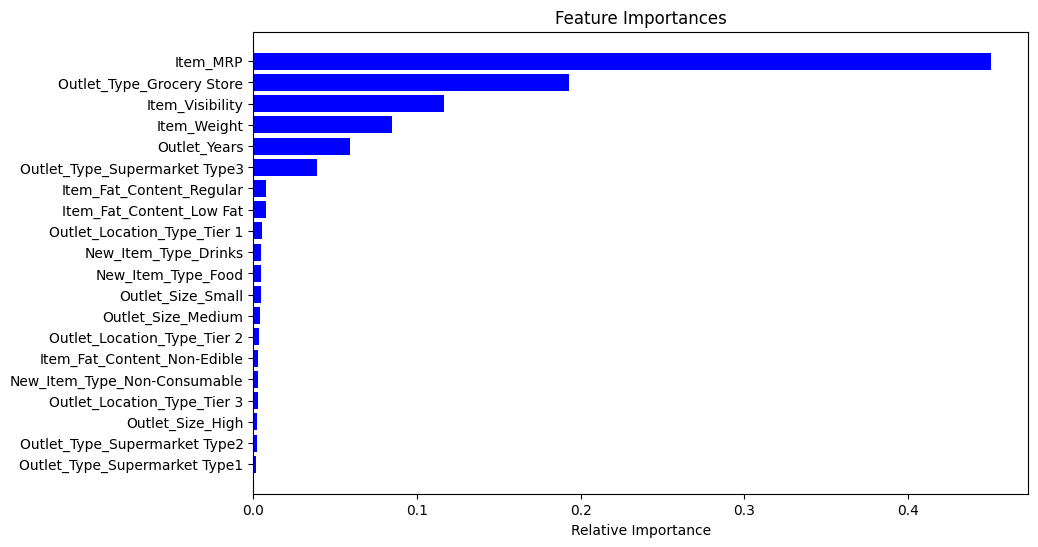


------------------------------------------------------------

Results for linear_regression:
Training Score: 0.5584
Test Score: 0.5804
Feature Importances:


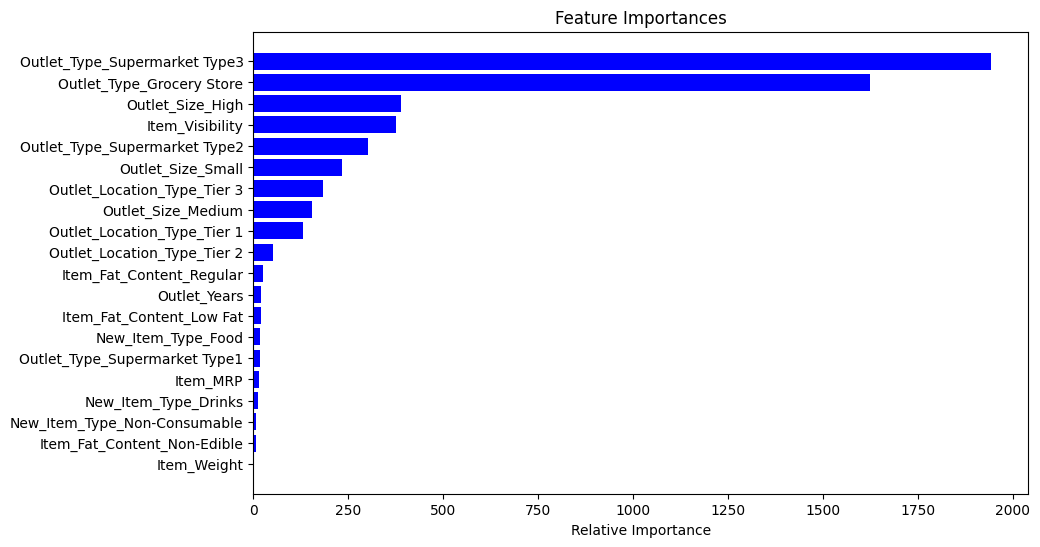


------------------------------------------------------------

Results for svr:
Training Score: 0.1799
Test Score: 0.2008

------------------------------------------------------------

Results for xgboost:
Training Score: 0.8600
Test Score: 0.5341
Feature Importances:


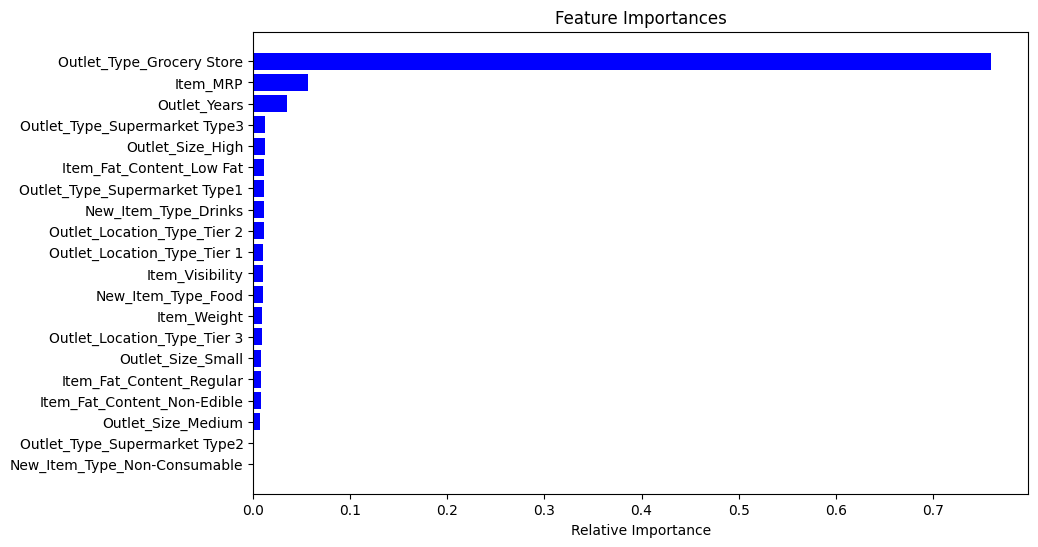


------------------------------------------------------------

Results for gradient_boosting:
Training Score: 0.6335
Test Score: 0.6033
Feature Importances:


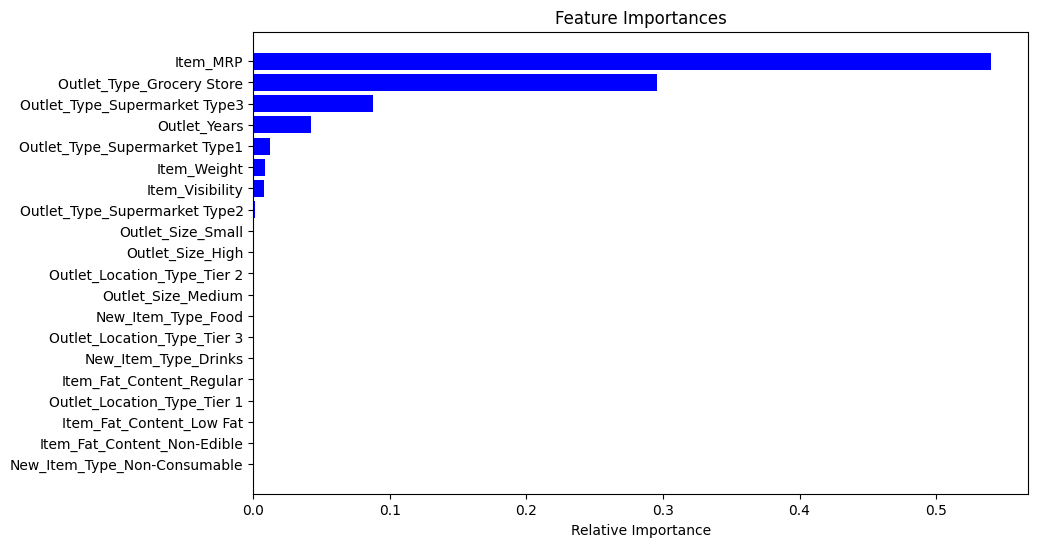


------------------------------------------------------------

Results for decision_tree:
Training Score: 1.0000
Test Score: 0.2070
Feature Importances:


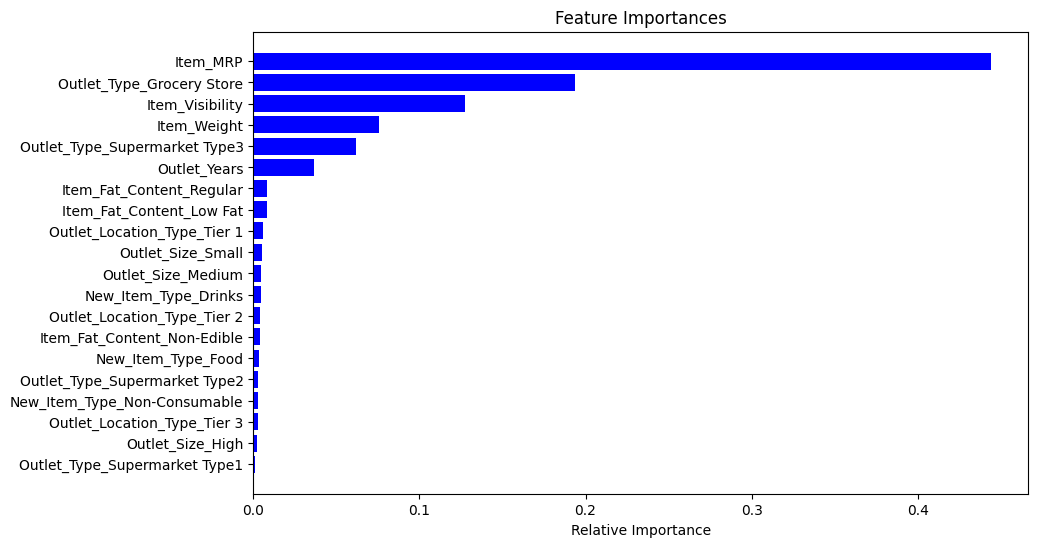


------------------------------------------------------------

Results for knn:
Training Score: 0.6155
Test Score: 0.4027

------------------------------------------------------------

Results for elastic_net:
Training Score: 0.4397
Test Score: 0.4517
Feature Importances:


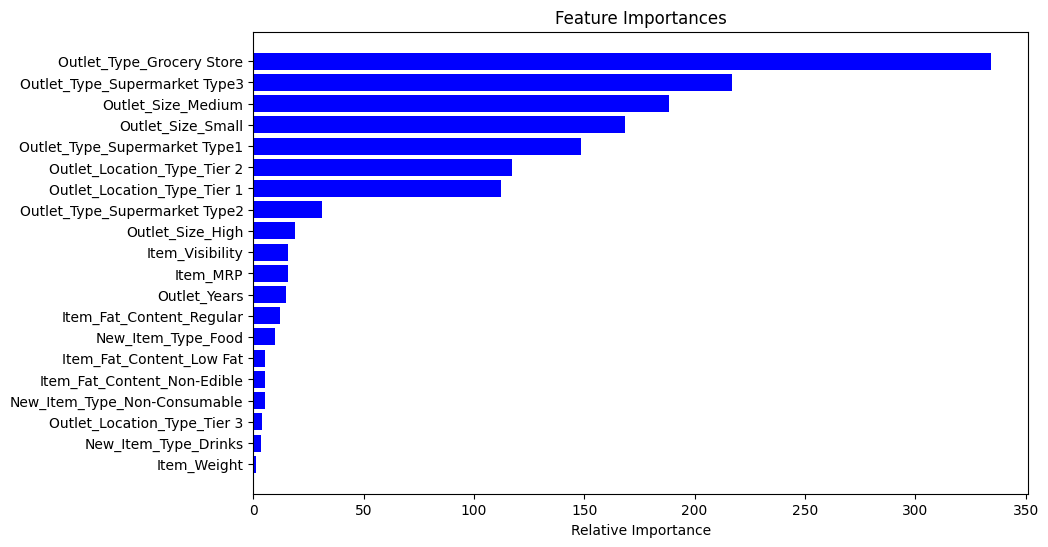


------------------------------------------------------------

                   Training Score  Test Score
random_forest            0.937295    0.558741
linear_regression        0.558427    0.580367
svr                      0.179870    0.200818
xgboost                  0.860044    0.534122
gradient_boosting        0.633477    0.603273
decision_tree            1.000000    0.207041
knn                      0.615483    0.402708
elastic_net              0.439664    0.451675


In [141]:
# Assuming CustomModel class is already defined and imported
model_types = ['random_forest', 'linear_regression', 'svr', 'xgboost', 'gradient_boosting', 'decision_tree', 'knn', 'elastic_net']

# Dictionary to store the results
results = {}

# Iterate over each model type, fit, predict, and display results
for model_type in model_types:
    print(f"Results for {model_type}:")
    model = CustomModel(model_type=model_type)
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)

    # Storing results
    results[model_type] = {'Training Score': train_score, 'Test Score': test_score}

    # Output scores
    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")

    # Feature Importance - Only if applicable
    if model_type not in ['svr', 'knn']:  # Assuming SVR and KNN don't support feature importance in your implementation
        print("Feature Importances:")
        model.get_feature_importance(X_train.columns)
    print("\n" + "-"*60 + "\n")

# Optionally, convert results to a DataFrame for better visualization or further analysis
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

In [142]:
# 그라디언트 부스팅 모델 정의
model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5]  # 트리의 최대 깊이
}

# R^2를 사용하여 그리드 서치 수행
r2_scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search.fit(X_train, Y_train)

# 최적 하이퍼파라미터와 최고 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best R^2 score: 0.5972346565964006


In [145]:
# 그라디언트 부스팅 모델 정의 / 최종 R2:0.59684
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)

# 10-fold 교차 검증 수행
mse_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')

# 교차 검증 결과 출력
print("Mean MSE score:", -mse_scores.mean())  # negate back to positive value
print("Mean R^2 score:", r2_scores.mean())

Mean MSE score: 1189555.0495469316
Mean R^2 score: 0.5968436381330631


In [235]:
np.sqrt(1189555)

1090.6672269762212

# 테스트 : xgbrf 앙상블 모델 .59867 / 주의: 기본(knn+원핫 인코딩 기준)

In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score, KFold

In [204]:
# XGBRF 리그레서 모델 생성
model = XGBRFRegressor()

# R2 점수를 기준으로 평가하기 위한 scorer 생성
scorer = make_scorer(r2_score)

# 10-fold cross-validation을 사용하여 모델 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring=scorer)

# 각 fold에 대한 R2 점수 출력
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R2 Score = {score}")

# 평균 R2 점수 계산
print(f"\n평균 R2 점수: {np.mean(cv_scores)}")

Fold 1: R2 Score = 0.6208856192625143
Fold 2: R2 Score = 0.6157552762650895
Fold 3: R2 Score = 0.5726664683525452
Fold 4: R2 Score = 0.6163800350262312
Fold 5: R2 Score = 0.5934753125338522
Fold 6: R2 Score = 0.6073870888454034
Fold 7: R2 Score = 0.5725388839716723
Fold 8: R2 Score = 0.6109321017635172
Fold 9: R2 Score = 0.6089394767129139
Fold 10: R2 Score = 0.5678156088361932

평균 R2 점수: 0.5986775871569933


# 테스트  xgbrf 앙상블 모델 .59893 / 컬럼 드랍 / .60037-1078 컬럼 컨트롤


In [205]:
xg = XGBRFRegressor(random_state=42)
xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature' : X.columns,
    'XGBRF_Importance' : xg1.feature_importances_
}).sort_values(by='XGBRF_Importance', ascending=False)

,feature,XGBRF_Importance
13,Outlet_Type_Grocery Store,0.533884
16,Outlet_Type_Supermarket Type3,0.251013
0,Item_MRP,0.071620
2,Outlet_Years,0.049771
9,Outlet_Size_Small,0.035511
14,Outlet_Type_Supermarket Type1,0.028987
15,Outlet_Type_Supermarket Type2,0.012010
7,Outlet_Size_High,0.003871
12,Outlet_Location_Type_Tier 3,0.002689
3,Item_Visibility_imputed,0.001905


In [215]:
# XGBRF 리그레서 모델 생성
model = XGBRFRegressor()

# R2 점수를 기준으로 평가하기 위한 scorer 생성
scorer = make_scorer(r2_score)

# 10-fold cross-validation을 사용하여 모델 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X.drop(['New_Item_Type_Drinks', 'Outlet_Location_Type_Tier 2', 'Item_Weight_imputed', 'New_Item_Type_Non-Consumable',	'Item_Fat_Content_Low Fat', 'New_Item_Type_Food', 'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 1', 'Outlet_Size_Medium'], axis=1), y, cv=kfold, scoring=scorer)

# 각 fold에 대한 R2 점수 출력
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R2 Score = {score}")

# 평균 R2 점수 계산
print(f"\n평균 R2 점수: {np.mean(cv_scores)}")

Fold 1: R2 Score = 0.6199432811194715
Fold 2: R2 Score = 0.6149224455387468
Fold 3: R2 Score = 0.5770324943572211
Fold 4: R2 Score = 0.6198339338189548
Fold 5: R2 Score = 0.593934238296572
Fold 6: R2 Score = 0.6114046669481039
Fold 7: R2 Score = 0.5721879781114151
Fold 8: R2 Score = 0.6145250717793356
Fold 9: R2 Score = 0.6101889146807602
Fold 10: R2 Score = 0.5698267488651878

평균 R2 점수: 0.6003799773515769


In [233]:
# XGBRF 리그레서 모델 생성
model = XGBRFRegressor()

# MSE를 기준으로 평가하기 위한 scorer 생성
scorer = make_scorer(mean_squared_error)

# 10-fold cross-validation을 사용하여 모델 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring=scorer)

# 각 fold에 대한 RMSE 점수 출력
for i, score in enumerate(cv_scores, 1):
    rmse = np.sqrt(score)
    print(f"Fold {i}: RMSE = {rmse}")

# 평균 RMSE 계산
mean_rmse = np.sqrt(np.mean(cv_scores))
print(f"\n평균 RMSE: {mean_rmse}")

Fold 1: RMSE = 1030.8167480040922
Fold 2: RMSE = 1007.3189792735967
Fold 3: RMSE = 1119.7800080814877
Fold 4: RMSE = 1029.5636711918276
Fold 5: RMSE = 1086.0646965636477
Fold 6: RMSE = 1066.2368104635782
Fold 7: RMSE = 1165.8419800799372
Fold 8: RMSE = 1041.751599801181
Fold 9: RMSE = 1074.3566242224576
Fold 10: RMSE = 1154.6218529475107

평균 RMSE: 1078.860902625384


In [237]:
# mean_absolute error 검증 / 713.5095 / 인도 성님보다 나음
from sklearn.metrics import mean_absolute_error
xg_final = XGBRFRegressor()
xg_final.fit(X_train, Y_train)

In [241]:
y_pred = xg_final.predict(X_test)

In [242]:
mean_absolute_error(Y_test, y_pred)

713.509559684042

# 모델 뽑기

In [216]:
import joblib

In [217]:
joblib.dump(model, 'big_mart_model_srk')

['big_mart_model_srk']

In [218]:
joblib.load('big_mart_model_srk')

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [221]:
X.drop(columns=['New_Item_Type_Drinks', 'Outlet_Location_Type_Tier 2', 'Item_Weight_imputed',
                'New_Item_Type_Non-Consumable', 'Item_Fat_Content_Low Fat', 'New_Item_Type_Food',
                'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
                'Outlet_Location_Type_Tier 1', 'Outlet_Size_Medium'], inplace=True)


In [222]:
X

,Item_MRP,Outlet_Years,Item_Visibility_imputed,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,24,0.016047,False,False,False,False,True,False,False
1,48.2692,14,0.019278,False,False,True,False,False,True,False
2,141.6180,24,0.016760,False,False,False,False,True,False,False
3,182.0950,25,0.047581,False,True,True,True,False,False,False
4,53.8614,36,0.070290,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,36,0.056783,True,False,True,False,True,False,False
8519,108.1570,21,0.046982,False,True,False,False,True,False,False
8520,85.1224,19,0.035186,False,True,False,False,True,False,False
8521,103.1332,14,0.145221,False,False,True,False,False,True,False


In [223]:
# 최종 csv 뽑기
X.to_csv('X_data.csv', index=False)

# 질척대기(cat_boost) .58354

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [231]:
from catboost import CatBoostRegressor # .58354

# CatBoost 리그레서 모델 생성
model = CatBoostRegressor()

# R2 점수를 기준으로 평가하기 위한 scorer 생성
scorer = make_scorer(r2_score)

# 10-fold cross-validation을 사용하여 모델 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kfold, scoring=scorer)

# 각 fold에 대한 R2 점수 출력
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R2 Score = {score}")

# 평균 R2 점수 계산
print(f"\n평균 R2 점수: {np.mean(cv_scores)}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
16:	learn: 1199.8912563	total: 107ms	remaining: 6.19s
17:	learn: 1188.3035946	total: 111ms	remaining: 6.06s
18:	learn: 1177.5963605	total: 115ms	remaining: 5.96s
19:	learn: 1167.6043368	total: 120ms	remaining: 5.86s
20:	learn: 1159.1869181	total: 124ms	remaining: 5.78s
21:	learn: 1151.0142086	total: 128ms	remaining: 5.7s
22:	learn: 1143.5324816	total: 132ms	remaining: 5.62s
23:	learn: 1136.7111429	total: 137ms	remaining: 5.56s
24:	learn: 1130.4597956	total: 141ms	remaining: 5.5s
25:	learn: 1124.8452246	total: 146ms	remaining: 5.45s
26:	learn: 1119.7802901	total: 151ms	remaining: 5.43s
27:	learn: 1115.0298851	total: 156ms	remaining: 5.4s
28:	learn: 1110.5844588	total: 159ms	remaining: 5.33s
29:	learn: 1107.0687718	total: 164ms	remaining: 5.29s
30:	learn: 1103.5368602	total: 168ms	remaining: 5.25s
31:	learn: 1100.5627287	total: 173ms	remaining: 5.22s
32:	learn: 1098.4121079	total: 177ms	remaining: 5.19s
33:	learn: 1095.5803086	total: 182ms	remaining: 5

# 파이캐릿 써보기

In [ ]:
!pip install pycaret

In [38]:
train = df.sample(frac=0.80, random_state=786) # 트레인 데이터 스플릿, 랜덤스테이트: 786
test = df.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [39]:
train = df
train.reset_index(inplace=True, drop=True)

In [48]:
from pycaret.regression import *
# 파이캐릿 리그레션으로 셋업 설정 정하기. data=트레인, target=목표값. 세션아이디 = 786
# 클래스피케이션 등 파이케릿 타깃 유형 변경 필요시 : pycaret.classification

exp_clf = setup(data=train, target='Item_Outlet_Sales', session_id=786, preprocess=True)

,Description,Value
0,Session id,786
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 26)"
4,Transformed data shape,"(8523, 50)"
5,Transformed train set shape,"(5966, 50)"
6,Transformed test set shape,"(2557, 50)"
7,Numeric features,6
8,Categorical features,3
9,Rows with missing values,6.2%


In [47]:
# 자동 전처리 없음
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,782.4779,1251275.7873,1117.8714,0.5725,0.5604,0.5783,0.9080
dummy,Dummy Regressor,1358.2164,2939339.4500,1713.5061,-0.0020,1.0915,2.2303,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=786)

In [49]:
# 자동 전처리 있음
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,869.3392,1557413.6768,1246.6419,0.4684,0.6109,0.6284,1.0640
lightgbm,Light Gradient Boosting Machine,870.8806,1580320.5764,1255.9252,0.4604,0.5976,0.6212,0.4970
rf,Random Forest Regressor,883.6767,1609728.0400,1267.3508,0.4509,0.5975,0.6134,3.1240
et,Extra Trees Regressor,893.4876,1644577.0486,1280.9164,0.4386,0.6035,0.6178,2.5640
lr,Linear Regression,945.0503,1648548.6193,1282.9427,0.4373,0.7698,1.0579,0.1760
ridge,Ridge Regression,945.0717,1649214.3862,1283.1978,0.4371,0.7690,1.0566,0.3050
lasso,Lasso Regression,945.4412,1651739.6055,1284.1771,0.4362,0.7675,1.0543,0.2040
llar,Lasso Least Angle Regression,945.7084,1653008.8892,1284.6341,0.4358,0.7648,1.0538,0.1010
br,Bayesian Ridge,946.1217,1654157.8783,1285.1200,0.4354,0.7663,1.0541,0.1060
xgboost,Extreme Gradient Boosting,915.4469,1736402.6625,1316.6857,0.4074,0.6657,0.6482,0.2710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=786)

In [50]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,805.0067,1313044.6695,1145.8816,0.5156,0.6165,0.6354
1,862.3478,1504922.5056,1226.7528,0.4506,0.5904,0.6116
2,901.1840,1689269.6636,1299.7191,0.4035,0.6004,0.6340
3,953.9533,1772600.1425,1331.3903,0.4316,0.6182,0.6592
4,843.9025,1514387.2041,1230.6044,0.4265,0.6005,0.6232
5,853.5101,1543734.4364,1242.4711,0.4554,0.6020,0.6422
6,881.4567,1481596.4137,1217.2085,0.5184,0.6374,0.5800
7,856.8527,1543059.2325,1242.1994,0.5020,0.6505,0.6514
8,904.5628,1789854.3384,1337.8544,0.4445,0.6068,0.6320


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
tune_model(estimator = gbr, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:01:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,781.7158,1181532.0735,1086.9830,0.5641,0.5945,0.6408
1,838.8557,1404864.7764,1185.2699,0.4872,0.5879,0.6215
2,847.7018,1454408.9203,1205.9888,0.4865,0.6140,0.6516
3,922.9335,1607420.1276,1267.8407,0.4846,0.6348,0.6749
4,796.0476,1304538.1717,1142.1638,0.5059,0.5898,0.6195
5,795.9314,1330106.8167,1153.3026,0.5308,0.6045,0.6508
6,841.6777,1386345.7411,1177.4318,0.5493,0.5773,0.5975
7,844.8012,1433841.0753,1197.4310,0.5372,0.6358,0.6801
8,852.4774,1474776.7695,1214.4039,0.5423,0.6206,0.6196


GradientBoostingRegressor(max_depth=5, max_features='log2',
                          min_impurity_decrease=0.05, min_samples_split=7,
                          n_estimators=50, random_state=786, subsample=0.85)

In [52]:
rf = create_model('rf') #rf 랜덤포레스트 객체 생성

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,815.4627,1365526.0979,1168.5573,0.4963,0.5903,0.6119
1,861.2827,1507123.5295,1227.6496,0.4498,0.5947,0.6076
2,894.3829,1657336.5254,1287.3758,0.4148,0.5941,0.6150
3,995.0518,1941027.2900,1393.2076,0.3776,0.6265,0.6599
4,864.3922,1573135.7730,1254.2471,0.4042,0.6017,0.5994
5,863.5761,1580995.6682,1257.3765,0.4423,0.5952,0.6225
6,904.1692,1596094.0650,1263.3662,0.4812,0.5782,0.5792
7,869.4134,1598336.8305,1264.2535,0.4841,0.6109,0.6492
8,923.0896,1794064.4677,1339.4269,0.4432,0.6031,0.6036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tune_model(estimator = rf, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:04:22
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
blend_best2 = blend_models(estimator_list=[gbr, rf], fold=5, optimize='R2') # 모델 블랜딩 진행

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,855.7983,1505722.6768,1227.0789,0.4482,0.5990,0.6271
1,930.9296,1766485.8321,1329.0921,0.4074,0.6108,0.6463
2,877.2683,1657855.9268,1287.5775,0.3960,0.6101,0.6319
3,872.0924,1552914.3210,1246.1598,0.4966,0.5895,0.6110
4,876.6568,1629982.6171,1276.7077,0.4815,0.5950,0.6086
Mean,882.5491,1622592.2748,1273.3232,0.4459,0.6009,0.6250
Std,25.4096,90018.9073,35.2170,0.0395,0.0084,0.0139


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [55]:
tune_model(estimator = blend_best2, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:10:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Voting Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,802.4223,1309804.8711,1144.4671,0.5168,0.5950,0.6240
1,856.9243,1486442.8009,1219.1976,0.4574,0.5851,0.6050
2,893.0396,1660965.3788,1288.7845,0.4135,0.5947,0.6240
3,962.1130,1802116.4479,1342.4293,0.4221,0.6170,0.6551
4,843.7849,1510744.7996,1229.1236,0.4278,0.5963,0.6121
5,851.6619,1535778.7436,1239.2654,0.4582,0.5952,0.6328
6,884.3045,1494809.8454,1222.6242,0.5141,0.5747,0.5708
7,853.7305,1542971.6483,1242.1641,0.5020,0.6112,0.6459
8,903.4583,1764573.6267,1328.3725,0.4523,0.5996,0.6159


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=786)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=786))],
                n_jobs=-1, weights=[0.73, 0.31])